In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation, Dense
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.metrics import categorical_crossentropy

In [2]:
model = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

In [3]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [4]:
import numpy as np
from random import randint
from sklearn.utils import shuffle
from sklearn.preprocessing import MinMaxScaler

In [5]:
train_labels = []
train_samples = []

In [6]:
for i in range(50):
    # The ~5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(1)

    # The ~5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(0)

for i in range(1000):
    # The ~95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    train_samples.append(random_younger)
    train_labels.append(0)

    # The ~95% of older individuals who did experience side effects
    random_older = randint(65,100)
    train_samples.append(random_older)
    train_labels.append(1)

In [7]:
train_labels = np.array(train_labels)
train_samples = np.array(train_samples)
train_labels, train_samples = shuffle(train_labels, train_samples)

In [8]:
scaler = MinMaxScaler(feature_range=(0,1))
scaled_train_samples = scaler.fit_transform(train_samples.reshape(-1,1))

In [9]:
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [10]:
model.fit(x=scaled_train_samples, y=train_labels, validation_split=0.1, batch_size=10, epochs=30, verbose=2)

Epoch 1/30
189/189 - 0s - loss: 0.6563 - accuracy: 0.5450 - val_loss: 0.6323 - val_accuracy: 0.6143
Epoch 2/30
189/189 - 0s - loss: 0.6277 - accuracy: 0.6217 - val_loss: 0.6019 - val_accuracy: 0.6571
Epoch 3/30
189/189 - 0s - loss: 0.6003 - accuracy: 0.6878 - val_loss: 0.5739 - val_accuracy: 0.6952
Epoch 4/30
189/189 - 0s - loss: 0.5723 - accuracy: 0.7270 - val_loss: 0.5449 - val_accuracy: 0.7667
Epoch 5/30
189/189 - 0s - loss: 0.5428 - accuracy: 0.7783 - val_loss: 0.5154 - val_accuracy: 0.8095
Epoch 6/30
189/189 - 0s - loss: 0.5125 - accuracy: 0.8011 - val_loss: 0.4853 - val_accuracy: 0.8190
Epoch 7/30
189/189 - 0s - loss: 0.4823 - accuracy: 0.8206 - val_loss: 0.4561 - val_accuracy: 0.8381
Epoch 8/30
189/189 - 0s - loss: 0.4533 - accuracy: 0.8434 - val_loss: 0.4274 - val_accuracy: 0.8619
Epoch 9/30
189/189 - 0s - loss: 0.4262 - accuracy: 0.8571 - val_loss: 0.4022 - val_accuracy: 0.8905
Epoch 10/30
189/189 - 0s - loss: 0.4019 - accuracy: 0.8677 - val_loss: 0.3795 - val_accuracy: 0.9048

# Creating test set

In [11]:
test_labels =  []
test_samples = []

for i in range(10):
    # The 5% of younger individuals who did experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(1)

    # The 5% of older individuals who did not experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(0)

for i in range(200):
    # The 95% of younger individuals who did not experience side effects
    random_younger = randint(13,64)
    test_samples.append(random_younger)
    test_labels.append(0)

    # The 95% of older individuals who did experience side effects
    random_older = randint(65,100)
    test_samples.append(random_older)
    test_labels.append(1)

test_labels = np.array(test_labels)
test_samples = np.array(test_samples)
test_labels, test_samples = shuffle(test_labels, test_samples)

scaled_test_samples = scaler.fit_transform(test_samples.reshape(-1,1))

In [12]:
predictions = model.predict(
      x=scaled_test_samples
    , batch_size=10
    , verbose=0
) 

In [13]:
for i in predictions:
    print(i)

[0.9566734  0.04332662]
[0.9666517 0.0333483]
[0.09961451 0.9003855 ]
[0.96523976 0.03476025]
[0.02413335 0.9758666 ]
[0.42482966 0.57517034]
[0.96401334 0.03598669]
[0.05752116 0.9424788 ]
[0.1423507 0.8576493]
[0.24651241 0.75348765]
[0.02255892 0.97744113]
[0.39205104 0.6079489 ]
[0.9532763  0.04672378]
[0.96666694 0.03333306]
[0.3003021 0.6996979]
[0.02952629 0.9704737 ]
[0.71473736 0.2852626 ]
[0.9619867  0.03801331]
[0.03375296 0.966247  ]
[0.09961451 0.9003855 ]
[0.5928172 0.4071828]
[0.06999277 0.9300073 ]
[0.96484315 0.03515683]
[0.89472437 0.1052757 ]
[0.9566734  0.04332662]
[0.03856064 0.9614393 ]
[0.965234   0.03476602]
[0.936817   0.06318299]
[0.9566734  0.04332662]
[0.02108499 0.97891504]
[0.02581474 0.9741853 ]
[0.04449885 0.95550114]
[0.96444815 0.03555187]
[0.962408   0.03759198]
[0.96666694 0.03333306]
[0.03856064 0.9614393 ]
[0.42482966 0.57517034]
[0.12657109 0.87342894]
[0.22217776 0.77782226]
[0.9566734  0.04332662]
[0.1423507 0.8576493]
[0.89472437 0.1052757 ]
[0

In [ ]:
rounded_predictions = np.argmax(predictions, axis=-1)

for i in rounded_predictions:
    print(i)

# Plotting a confusion matrix 

In [16]:
%matplotlib inline
from sklearn.metrics import confusion_matrix
import itertools
import matplotlib.pyplot as plt

In [17]:
cm = confusion_matrix(y_true=test_labels, y_pred=rounded_predictions)

In [18]:
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion matrix, without normalization
[[197  13]
 [ 10 200]]


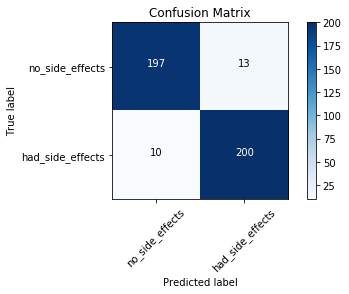

In [19]:
cm_plot_labels = ['no_side_effects','had_side_effects']
plot_confusion_matrix(cm=cm, classes=cm_plot_labels, title='Confusion Matrix')

# Saving and loading the model in its entirety 

In [21]:
model.save('medical_trial_model.h5')

In [23]:
from tensorflow.keras.models import load_model
new_model = load_model('medical_trial_model.h5')

In [24]:
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


In [25]:
new_model.get_weights()

[array([[-0.22139654, -0.02549607,  0.5179934 ,  0.7373178 ,  0.65594035,
          0.2006769 ,  0.6990535 , -0.0642705 , -0.53067046,  0.25747067,
         -0.50436854,  0.71522224,  0.2614286 , -0.27318132, -0.07319623,
          0.47995654]], dtype=float32),
 array([ 0.        ,  0.        , -0.15068294, -0.11494525,  0.1902941 ,
         0.24740125, -0.14962143,  0.        ,  0.        , -0.09796523,
         0.        , -0.15355678, -0.10218316,  0.        ,  0.        ,
        -0.14271662], dtype=float32),
 array([[ 0.07532257,  0.12113106,  0.05885732, -0.333237  ,  0.05503526,
          0.2817895 ,  0.16644719, -0.04451793, -0.18358357,  0.18033364,
         -0.22450404,  0.12516567,  0.23197559,  0.19146612, -0.02668273,
          0.18695506,  0.04515386, -0.24050617,  0.17119798, -0.19926946,
          0.03255582, -0.22194353, -0.13226464,  0.35074726,  0.06613564,
         -0.08416328, -0.30388096,  0.34742382,  0.0206013 , -0.3275567 ,
          0.26159635,  0.27111718],
 

In [26]:
new_model.optimizer

# Saving and loading only the architecture of the model 

In [28]:
# save as JSON
json_string = model.to_json()

# save as YAML
#yaml_string = model.to_yaml()

In [29]:
json_string

'{"class_name": "Sequential", "config": {"name": "sequential", "layers": [{"class_name": "InputLayer", "config": {"batch_input_shape": [null, 1], "dtype": "float32", "sparse": false, "ragged": false, "name": "dense_input"}}, {"class_name": "Dense", "config": {"name": "dense", "trainable": true, "batch_input_shape": [null, 1], "dtype": "float32", "units": 16, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_regularizer": null, "activity_regularizer": null, "kernel_constraint": null, "bias_constraint": null}}, {"class_name": "Dense", "config": {"name": "dense_1", "trainable": true, "dtype": "float32", "units": 32, "activation": "relu", "use_bias": true, "kernel_initializer": {"class_name": "GlorotUniform", "config": {"seed": null}}, "bias_initializer": {"class_name": "Zeros", "config": {}}, "kernel_regularizer": null, "bias_r

In [30]:
# model reconstruction from YAML
from tensorflow.keras.models import model_from_json
model_architecture = model_from_json(json_string)

# model reconstruction from YAML
#from tensorflow.keras.models import model_from_yaml
#model_architecture = model_from_yaml(yaml_string)

In [31]:
model_architecture.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                32        
_________________________________________________________________
dense_1 (Dense)              (None, 32)                544       
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 66        
Total params: 642
Trainable params: 642
Non-trainable params: 0
_________________________________________________________________


# Saving and loading the weights of the model

In [33]:
model.save_weights('my_model_weights.h5')

In [34]:
model2 = Sequential([
    Dense(units=16, input_shape=(1,), activation='relu'),
    Dense(units=32, activation='relu'),
    Dense(units=2, activation='softmax')
])

model2.load_weights('my_model_weights.h5')

In [36]:
model2.get_weights()

[array([[-0.22139654, -0.02549607,  0.5179934 ,  0.7373178 ,  0.65594035,
          0.2006769 ,  0.6990535 , -0.0642705 , -0.53067046,  0.25747067,
         -0.50436854,  0.71522224,  0.2614286 , -0.27318132, -0.07319623,
          0.47995654]], dtype=float32),
 array([ 0.        ,  0.        , -0.15068294, -0.11494525,  0.1902941 ,
         0.24740125, -0.14962143,  0.        ,  0.        , -0.09796523,
         0.        , -0.15355678, -0.10218316,  0.        ,  0.        ,
        -0.14271662], dtype=float32),
 array([[ 0.07532257,  0.12113106,  0.05885732, -0.333237  ,  0.05503526,
          0.2817895 ,  0.16644719, -0.04451793, -0.18358357,  0.18033364,
         -0.22450404,  0.12516567,  0.23197559,  0.19146612, -0.02668273,
          0.18695506,  0.04515386, -0.24050617,  0.17119798, -0.19926946,
          0.03255582, -0.22194353, -0.13226464,  0.35074726,  0.06613564,
         -0.08416328, -0.30388096,  0.34742382,  0.0206013 , -0.3275567 ,
          0.26159635,  0.27111718],
 